###*Sayantan Mukherjee 60009220131 D2-2*

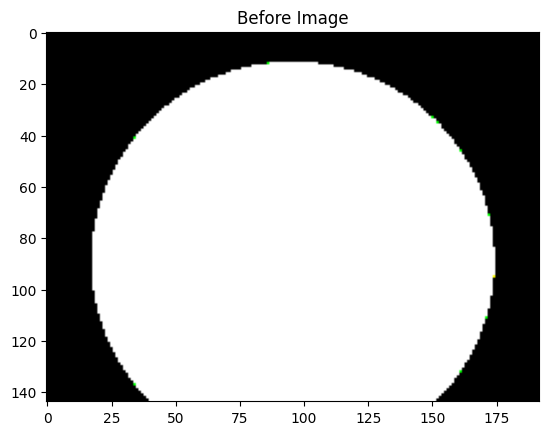

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

image_path = '/content/Image.jpg'
image = Image.open(image_path)
image_array = np.array(image)

_, before_image = cv2.threshold(image_array, 127, 255, cv2.THRESH_BINARY)

# Display the before image
plt.imshow(before_image, cmap='gray')
plt.title('Before Image')
plt.show()


##*Structure of 3x3*

In [5]:
import numpy as np

structuring_element = np.array([[1, 1, 1],
                                [1, 0, 1],
                                [1, 1, 1]])

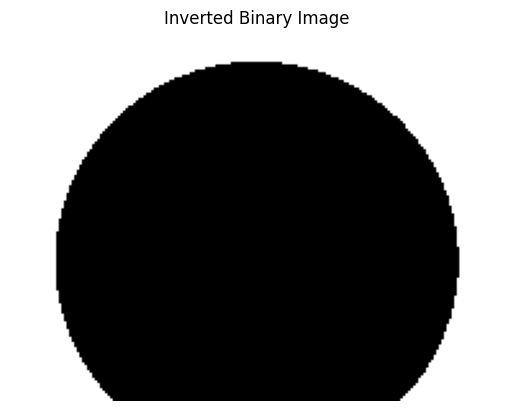

In [13]:
import cv2
import matplotlib.pyplot as plt

image_gry = cv2.imread('/content/Image.jpg', cv2.IMREAD_GRAYSCALE)

_, image = cv2.threshold(image_gry, 127, 255, cv2.THRESH_BINARY)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i, j] == 255:
            image[i, j] = 0
        else:
            image[i, j] = 255

plt.imshow(image, cmap='gray')
plt.title("Inverted Binary Image")
plt.axis('off')
plt.show()


###*1-Erosion*

In [14]:
import numpy as np

def erode(image, kernel):
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    eroded_image = image.copy()

    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            region = padded_image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            if np.all(region[kernel == 255] == 255):
                eroded_image[i-pad_h, j-pad_w] = 255
            else:
                eroded_image[i-pad_h, j-pad_w] = 0

    return eroded_image

###*2-Dilation*

In [15]:
import numpy as np

def dilate(image, kernel):
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)

    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            region = padded_image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            if np.any(region[kernel == 255] == 255):
                dilated_image[i-pad_h, j-pad_w] = 255
            else:
                dilated_image[i-pad_h, j-pad_w] = 0

    return dilated_image

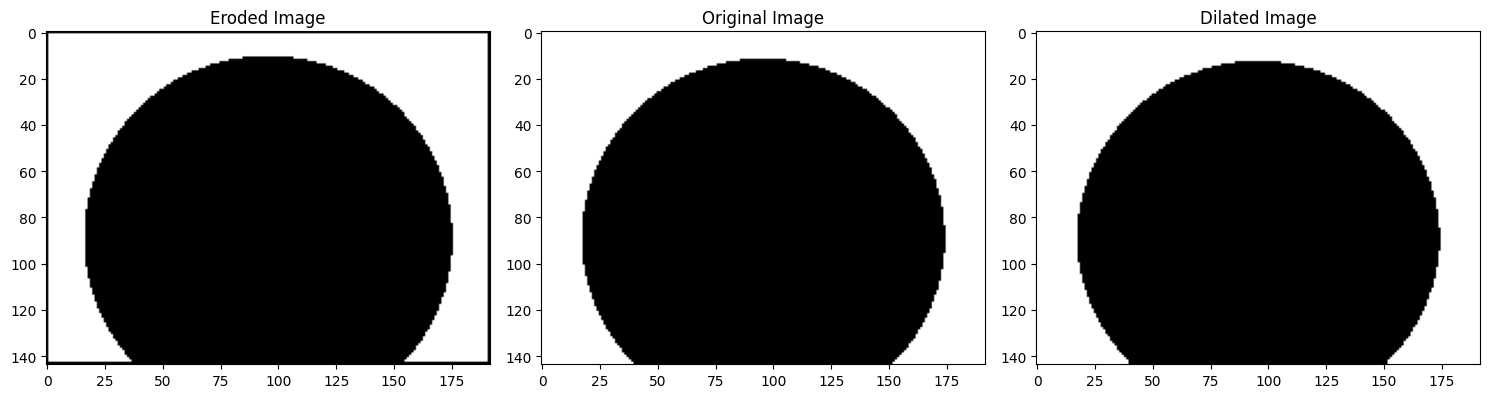

In [16]:
import numpy as np
import matplotlib.pyplot as plt

kernel = np.array([[0, 255, 0],
                   [0, 255, 0],
                   [0, 255, 0]], dtype=np.uint8)

e_kernel = np.array([[255, 0, 255],
                     [0, 255, 0],
                     [255, 0, 255]], dtype=np.uint8)


# Apply morphological operations
dilated = dilate(image, kernel)
eroded = erode(image, e_kernel)

# Visualize results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded Image')

plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 3)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')

plt.tight_layout()
plt.show()

###*3-Open,Close Operations*

In [21]:
def open(image, kernel):
    eroded_image = erode(image, kernel)
    opened_image = dilate(eroded_image, kernel)
    return opened_image

def close(image, kernel):
    dilated_image = dilate(image, kernel)
    closed_image = erode(dilated_image, kernel)
    return closed_image

Starting Opening operation...
Step 1: Erosion in progress...
Step 1 complete: Erosion done.
Step 2: Dilation in progress...
Step 2 complete: Dilation done.
Displaying Opening results...


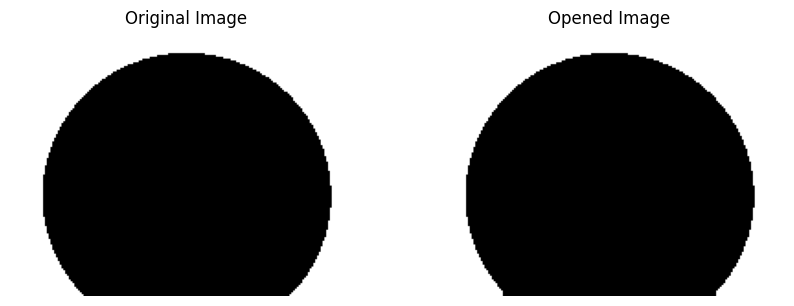

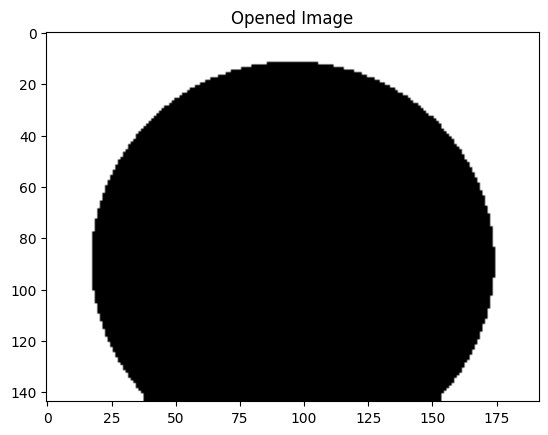

Starting Closing operation...
Step 1: Dilation in progress...
Step 1 complete: Dilation done.
Step 2: Erosion in progress...
Step 2 complete: Erosion done.
Displaying Closing results...


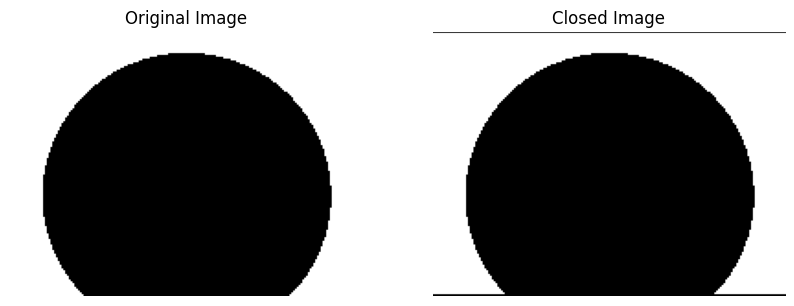

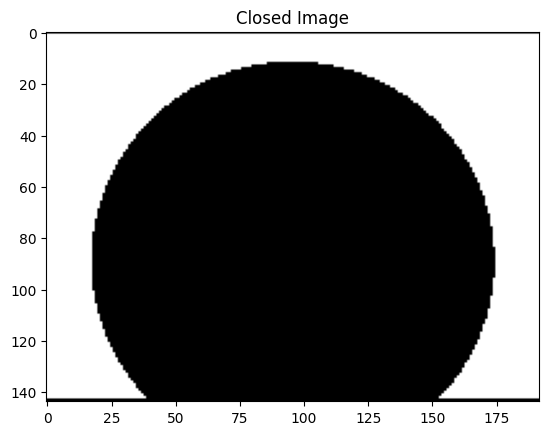

In [24]:
plt.imshow(open(image, kernel), cmap='gray')
plt.title('Opened Image')
plt.show()

plt.imshow(close(image, kernel), cmap='gray')
plt.title('Closed Image')
plt.show()

###*Hit and Miss Function*

In [27]:
import numpy as np

def erode(image, kernel):
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    eroded_image = image.copy()

    for i in range(pad_h, img_h + pad_h):
        for j in range(pad_w, img_w + pad_w):
            region = padded_image[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
            if np.all(region[kernel == 255] == 255):
                eroded_image[i - pad_h, j - pad_w] = 255
            else:
                eroded_image[i - pad_h, j - pad_w] = 0

    return eroded_image

def hit_or_miss(image, kernel_fg, kernel_bg):
    eroded_fg = erode(image, kernel_fg)
    img = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] == 255:
                img[i, j] = 0
            else:
                img[i, j] = 255
    eroded_bg = erode(img, kernel_bg)
    return np.bitwise_and(eroded_fg, eroded_bg)

kernel_fg = np.array([[0, 0, 0], [0, 255, 0], [0, 0, 0]], dtype=np.uint8)
kernel_bg = np.array([[255, 255, 255], [255, 0, 255], [255, 255, 255]], dtype=np.uint8)


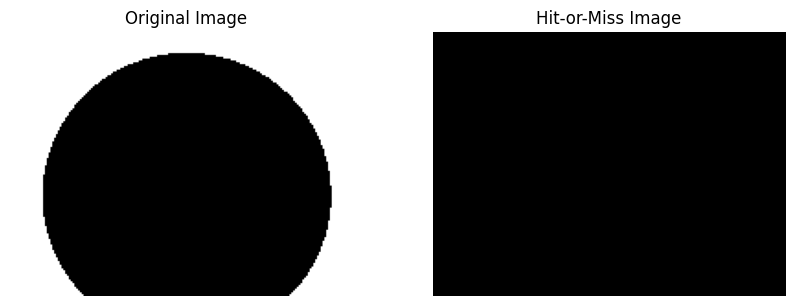

In [35]:
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

hit_miss_result = hit_or_miss(binary_image, kernel_fg, kernel_bg)

display_images(binary_image, hit_miss_result, "Hit-or-Miss Image")


#*Conclusion*

*In this assignment, we implemented a series of fundamental morphological operations on images, utilizing Python and the OpenCV library without relying on its built-in functions. This exercise aimed to deepen our understanding of spatial domain image processing techniques, specifically focusing on the following operations: erosion, dilation, opening, closing, and hit-or-miss transformation*

#1-Erosion

*Erosion reduces the boundaries of foreground objects in a binary image, effectively removing small-scale noise and imperfections. We designed a custom erosion function that utilized a structuring element to determine how the image is modified. The erosion operation was demonstrated by visualizing the original and processed images, showcasing how small objects and noise were eliminated*

#2-Dilation
*Dilation, conversely, expands the boundaries of foreground objects, thereby filling small holes and gaps. We implemented a dilation function that, similar to erosion, relied on a defined structuring element to dictate the expansion. The before-and-after images illustrated the enhancement of object sizes and connectivity*

#3-Opening
*Opening is a combination of erosion followed by dilation. It is particularly useful for removing small objects from an image while preserving the shape and size of larger objects. Our opening function was crafted by sequentially applying the erosion and dilation functions. The results effectively demonstrated the operation's ability to clean the image without significant loss of relevant features*

#4-Closing

*Closing is the inverse of opening, consisting of dilation followed by erosion. This operation is beneficial for closing small holes and gaps within larger objects. We implemented this process in a straightforward manner and displayed the results to highlight its effectiveness in refining image structures*

#5-Hit-or-Miss Transformation
*The hit-or-miss transformation serves as a powerful tool for detecting specific patterns or shapes within a binary image. We defined both foreground and background kernels to facilitate this operation. The implementation involved eroding the original image with the foreground kernel and a negated version of the original image with the background kernel, followed by a bitwise AND operation. The results were displayed to illustrate the successful detection of patterns specified by the structuring elements*

Structuring Elements
In each operation, the choice of structuring elements played a crucial role in determining the outcome. For the hit-or-miss transformation, we employed negated kernels to ensure that the transformations effectively identified specific structures while discarding unwanted noise